# Exploration of Loan Data from Prosper 
## by Jannis Müller


## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others

## Investigation Overview

Is there a relationship between specific variables and the status of a loan?

The huge dataset with a lot of informaton (81 variables) allows me to have deeper look at the question what factors affect a loan’s outcome status.

This is a very critical question for banks and loan companies in order to minimize the default risk and and to set the right interest rate (including setting a proper risk premium).




In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset
loan_data_clean = pd.read_csv('loan_data_master.csv')
loan_data_clean.head()

,Unnamed: 0,ListingKey,LoanStatus,Term,ProsperScore,EmploymentStatus,MonthlyLoanPayment,Recommendations,BorrowerAPR,BorrowerRate,LoanOriginalAmount,OpenCreditLines,StatedMonthlyIncome,TotalProsperPaymentsBilled,IncomeRange
0,0,1021339766868145413AB3B,Completed,36,NaN,Self-employed,330.43,0,0.16516,0.1580,9425,4.0,3083.333333,NaN,"$25,000-49,999"
1,1,10273602499503308B223C1,Current,36,7.0,Employed,318.93,0,0.12016,0.0920,10000,14.0,6125.000000,NaN,"$50,000-74,999"
2,2,0EE9337825851032864889A,Completed,36,NaN,Not available,123.32,0,0.28269,0.2750,3001,NaN,2083.333333,NaN,Not displayed
3,3,0EF5356002482715299901A,Current,36,9.0,Employed,321.45,0,0.12528,0.0974,10000,5.0,2875.000000,NaN,"$25,000-49,999"
4,4,0F023589499656230C5E3E2,Current,36,4.0,Employed,563.97,0,0.24614,0.2085,15000,19.0,9583.333333,11.0,"$100,000+"


## Prosper Score and Loan Status

The Prosper Score seems to affect the outcome of the loan: the most borrower have an Prosper Score of 8 when a loan is completed, while most borrower with defaulted and charged-off loans have an Prosper Score of 6. Furthermore, the most comon Prosper Score for borrowers with loans that have past due payments is 4

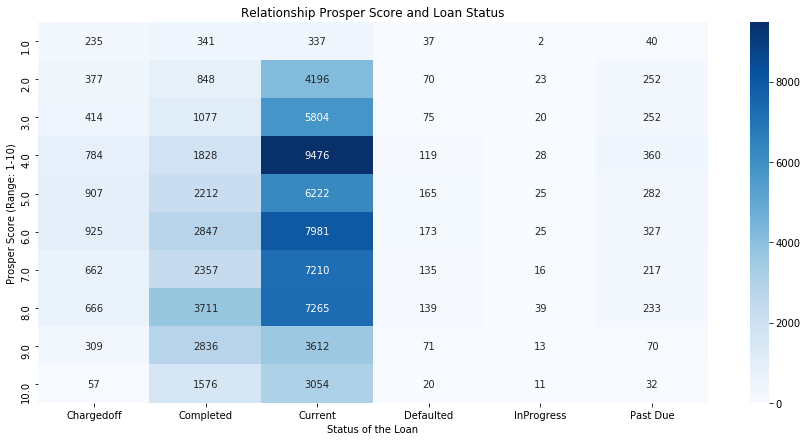

In [17]:

# In the first step I need to reshape the data to
ct_counts = loan_data_clean.groupby(['LoanStatus', 'ProsperScore']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'ProsperScore', columns = 'LoanStatus', values = 'count')

#plotting ProsperScore against LoanStatus with help of a heat map
plt.figure(figsize = [15,7])
mask = ct_counts.isnull()
sb.heatmap(ct_counts, annot = True, fmt = 'd', cmap = 'Blues',mask = mask)
plt.xlabel('Status of the Loan')
plt.ylabel('Prosper Score (Range: 1-10)')
plt.title('Relationship Prosper Score and Loan Status');

## Interest Rate and Loan Status

Loans that are charged-off, loans with past due payments and defaulted loans have in average higher interest rates than loans that are completed. The highest interest rates are asscociated with loans that are charged-off and with loans that have past due payments

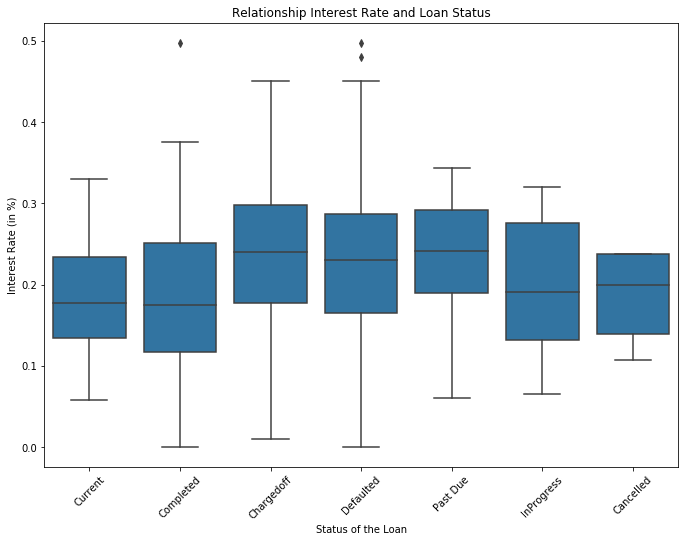

In [21]:
#plotting BorrowerRate (interest rate) with a violinplot and a boxplot against LoanStatus 
plt.figure(figsize = [25, 18])

plt.subplot(2, 2, 1)
sb.boxplot(data = loan_data_clean, x = 'LoanStatus', y = 'BorrowerRate', color = base_color, order = loan_data_clean['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Status of the Loan')
plt.ylabel('Interest Rate (in %)')
plt.title('Relationship Interest Rate and Loan Status');


## Prosper Score and Loan Status in relation to the interest rate

The interest rate is as well correlated to the Prosper Score as to the Status of the loan: the higher the Prosper Score, the lower the interest rate, the lower the risk for Prosper that the loan will be defaulted, charged-off or has past due payments

In [ ]:
g = sb.PairGrid(data = loan_data_clean, x_vars = ['MonthlyLoanPayment', 'BorrowerRate'],
                y_vars = ['LoanStatus','ProsperScore'], height = 5, aspect = 1)
g.map(sb.violinplot)
g.axes[1,0].set_xlabel('Monthly Loan Payments')
g.axes[1,1].set_xlabel('Interest Rate')
g.axes[0,0].set_ylabel('Status of the Loan')
g.axes[1,0].set_ylabel('Prosper Score')



> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!